In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
output_dir = 'batchdata/'
batch = np.load(os.path.join(output_dir, 'batch.npz'), allow_pickle=True)
batch_packed = np.load(os.path.join(output_dir, 'batch_packed.npz'), allow_pickle=True)

In [4]:
seq = {
    'tokens': batch['tokens'][0],
    'labels': batch['labels'][0],
    'mask': None,
    'input_pos': None
}
seq_pack = {
    'tokens': batch_packed['tokens'][0],
    'labels': batch_packed['labels'][0],
    'mask': batch_packed['mask'][0],
    'input_pos': batch_packed['input_pos'][0]
    }

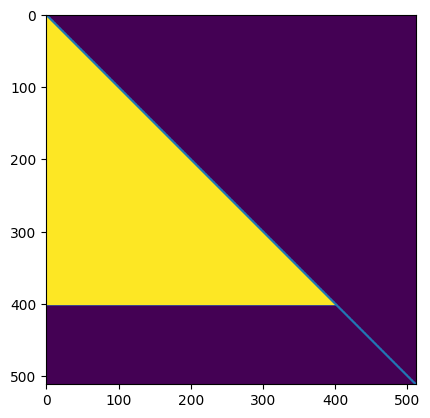

In [38]:
plt.figure()
plt.imshow(seq_pack['mask'])
plt.plot(seq_pack['input_pos'])

In [7]:
qkv = np.load('batchdata/qkv.npz')
q = qkv['q']
k = qkv['k']
v = qkv['v']
mask = qkv['mask']
input_pos = qkv['input_pos']

In [8]:
mask.shape

(4, 512, 512)

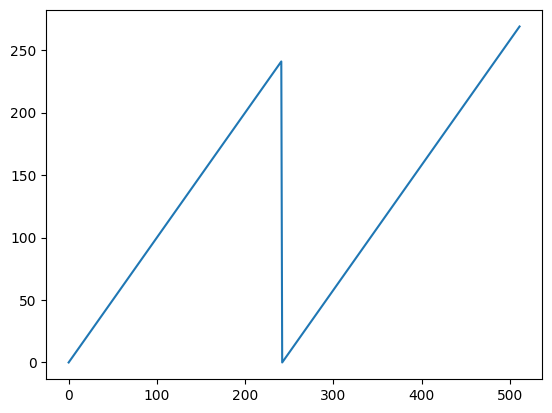

In [9]:
plt.figure()
# plt.imshow(mask[0])
plt.plot(input_pos[0])

### flash attention

In [3]:
# import torch
import random
import numpy as np

In [4]:
bs = 1
num_head = 32
max_seq_len = 512
head_dim = 64
num_seq_packed = 4
random.seed(20240711)
start_seq_packed = np.sort(np.append(random.sample(range(0,max_seq_len), num_seq_packed), 0))

mask = []
input_pos = []
for i, start in enumerate(start_seq_packed):
    seq_len = start_seq_packed[i+1]-start if i<num_seq_packed else max_seq_len-start
    mask_packing = np.tril(np.ones(seq_len, seq_len))
    mask.append(mask_packing)
    input_pos.extend(list(range(seq_len)))


In [5]:
# [max_seq_len, dim // 2, 2]
cache = np.ones((max_seq_len, head_dim//2, 2))
x = cache[input_pos]

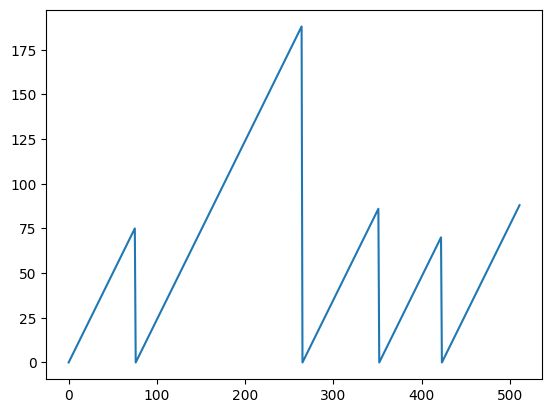

In [6]:
plt.figure()
plt.plot(input_pos)